### **Linear Regression:**
Apply linear regression on the Boston Housing dataset with "MV" as the dependent variable. Arrive at the final dataset with reduced number of columns, utilizing p-value, correlation coefficient, and multiple R-squared statistics. Use whatever libraries are appropriate when coding in Python. Can you run the same in Excel using a data analysis function and the prepared dataset?

In [21]:
! pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
import pandas as pd
import numpy as np
from sklearn import linear_model

housing_dataset = pd.read_excel("boston housing.xls")
#Displays top 5 rows
housing_dataset.head() 
housing_dataset1 = housing_dataset

In [31]:
#Check the shape of the data
housing_dataset.shape

(506, 14)

In [32]:
housing_dataset.describe() #Statistical inference of the dataset
#Includes count, mean of each column, standard diveation and percentage distribution

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,21.200001
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999,25.000000
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,50.000000


In [33]:
#Find number of null value in the dataset
housing_dataset.isnull().sum()

# None of the columns have any null value, hence data preprocessing w.r.t null not required

CRIM     0
ZN       0
INDUS    0
CHAS     0
NOX      0
RM       0
AGE      0
DIS      0
RAD      0
TAX      0
PT       0
B        0
LSTAT    0
MV       0
dtype: int64

In [26]:
# print(housing_data.columns[housing_data.isna().any()])

In [34]:
y = housing_dataset["MV"]
housing_dataset = housing_dataset.drop(columns="MV")
x = housing_dataset[housing_dataset.columns]
lm = linear_model.LinearRegression()
lm.fit(x,y)
lm.predict(x)

array([30.00384206, 25.02556259, 30.56759664, 28.60703616, 27.94352261,
       25.25628292, 23.00180888, 19.53598873, 11.52363738, 18.92026289,
       18.99949557, 21.58679559, 20.90652174, 19.55290253, 19.28348244,
       19.29748377, 20.52751003, 16.91140023, 16.17801099, 18.4061375 ,
       12.52385815, 17.67103744, 15.83288221, 13.80628661, 15.67833786,
       13.38668594, 15.46397711, 14.70847358, 19.54737242, 20.876428  ,
       11.45511717, 18.05923304,  8.81105704, 14.2827588 , 13.70675958,
       23.81463443, 22.34193674, 23.10890992, 22.91502539, 31.35762532,
       34.21510327, 28.02056437, 25.2038673 , 24.60979291, 22.9414913 ,
       22.09669928, 20.42320008, 18.03655198,  9.10655499, 17.20607859,
       21.28152546, 23.97222257, 27.65585199, 24.04901925, 15.36184793,
       31.15265026, 24.85687015, 33.10919822, 21.77537962, 21.08493488,
       17.87258073, 18.51110186, 23.98742729, 22.55408861, 23.37308585,
       30.36148369, 25.53056621, 21.11338518, 17.4215378 , 20.78

In [35]:
import statsmodels.api as sm
from statsmodels.api import OLS
x = sm.add_constant(x)
lm = sm.OLS(y,x).fit()
lm.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     MV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 26 Jan 2023   Prob (F-statistic):          6.72e-135
Time:                        01:48:17   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PT            -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
housing_dataset1 = housing_dataset1.drop(columns="INDUS")
housing_dataset1 = housing_dataset1.drop(columns="AGE")
housing_dataset = housing_dataset.drop(columns="INDUS")
housing_dataset = housing_dataset.drop(columns="AGE")

x = housing_dataset[housing_dataset.columns]
lm = linear_model.LinearRegression()
lm.fit(x,y)
lm.predict(x)
x = sm.add_constant(x)
lm = sm.OLS(y,x).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Thu, 26 Jan 2023   Prob (F-statistic):          5.54e-137
Time:                        01:48:20   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


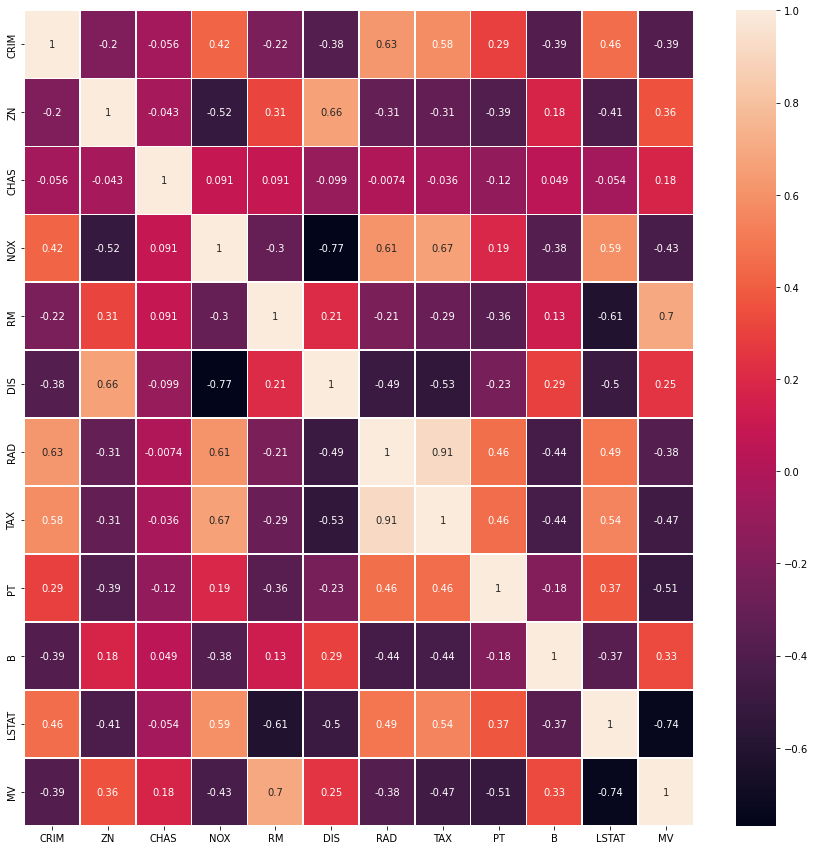

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))     
ax = sns.heatmap(housing_dataset1.corr(), annot=True, linewidths=.5, ax=ax)

### **Logistic Regression:**
Apply logistic regression on the Loan dataset with "Decision" as the dependent variable. Do the necessary one-hot encoding for the categorical variables and discard the irrelevant variables. Use whatever libraries are appropriate when coding in Python.

In [42]:
import pandas as pd
import numpy as np

loan_dataset = pd.read_excel("loan.xlsx")
loan_dataset.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,reject


In [43]:
loan_dataset = pd.get_dummies(loan_dataset, columns = ["Sex", "Res_status", "Telephone",	"Occupation",	"Job_status", "Liab_ref",	"Acc_ref"])
print(loan_dataset)

           Age  Time_at_address  Time_employed  Time_bank  Home_Expn  Balance  \
0    50.750000            0.585              0          0        145        0   
1    19.670000           10.000              0          0        140        0   
2    52.830002           15.000              5         14          0     2200   
3    22.670000            2.540              2          0          0        0   
4    29.250000           13.000              0          0        228        0   
..         ...              ...            ...        ...        ...      ...   
424  34.169998            2.750              2          0        232      200   
425  22.250000            1.250              3          0        280        0   
426  23.330000            1.500              1          0        422      200   
427  21.000000            4.790              2          1         80      300   
428  27.750000            1.290              0          0        140        0   

    Decision  Sex_F  Sex_M 

In [44]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.api import OLS

loan_dataset['Decision'].replace(['reject', 'accept'],[0, 1], inplace=True)
lr = LogisticRegression(solver='liblinear', random_state=0)
y = loan_dataset['Decision']
x = loan_dataset.drop(['Decision'],axis=1)
lr.fit(x, y)

x = sm.add_constant(x)
lr = sm.OLS(y, x).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:               Decision   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     8.298
Date:                Thu, 26 Jan 2023   Prob (F-statistic):           3.56e-25
Time:                        01:49:33   Log-Likelihood:                -213.78
No. Observations:                 429   AIC:                             483.6
Df Residuals:                     401   BIC:                             597.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0338 

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [45]:
loan_dataset = loan_dataset.drop(["Age", "Time_at_address", "Sex_F", "Sex_M", "Res_status_rent", "Telephone_not_given", "Occupation_creative_", "Occupation_driver", "Occupation_executive", "Occupation_labourer", "Occupation_manager", "Occupation_office_st", "Occupation_productio", "Occupation_sales", "Occupation_unemploye", "Job_status_governmen", "Job_status_military", "Job_status_private_s", "Job_status_retired", "Job_status_self_empl", "Job_status_student", "Job_status_unemploye", "Liab_ref_f", "Liab_ref_t", "Acc_ref_given", "Acc_ref_oth_inst_"], axis = 1)
lr = LogisticRegression(solver='liblinear', random_state=0)
y = loan_dataset['Decision']
x = loan_dataset.drop(['Decision'],axis=1)
lr.fit(x, y)

x = sm.add_constant(x)
lr = sm.OLS(y, x).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:               Decision   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     23.97
Date:                Thu, 26 Jan 2023   Prob (F-statistic):           2.56e-30
Time:                        01:49:43   Log-Likelihood:                -228.33
No. Observations:                 429   AIC:                             474.7
Df Residuals:                     420   BIC:                             511.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2158 

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [46]:
loan_dataset = loan_dataset.drop(["Home_Expn", "Occupation_guard_etc"], axis = 1)
lr = LogisticRegression(solver='liblinear', random_state=0)
y = loan_dataset['Decision']
x = loan_dataset.drop(['Decision'],axis=1)
lr.fit(x, y)

x = sm.add_constant(x)
lr = sm.OLS(y, x).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:               Decision   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     30.76
Date:                Thu, 26 Jan 2023   Prob (F-statistic):           1.22e-30
Time:                        01:49:53   Log-Likelihood:                -231.17
No. Observations:                 429   AIC:                             476.3
Df Residuals:                     422   BIC:                             504.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1710 

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [47]:
loan_dataset = loan_dataset.drop(["Res_status_owner", "Telephone_given"], axis = 1)
lr = LogisticRegression(solver='liblinear', random_state=0)
y = loan_dataset['Decision']
x = loan_dataset.drop(['Decision'],axis=1)
lr.fit(x, y)

x = sm.add_constant(x)
lr = sm.OLS(y, x).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:               Decision   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     35.93
Date:                Thu, 26 Jan 2023   Prob (F-statistic):           1.19e-30
Time:                        01:49:58   Log-Likelihood:                -233.07
No. Observations:                 429   AIC:                             478.1
Df Residuals:                     423   BIC:                             502.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2411 

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
